In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display


In [2]:
rating = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
])

In [3]:
np.mean(rating[rating > 0])

2.7692307692307692

In [89]:
class Matrix_Factorization():
    def __init__(self, rating=None, components=2, eta=0.1, gamma=0.01,_iter=100):
        self.rating = rating
        self.eta = eta
        self._iter = _iter
        self.gamma = gamma

        # 初期化
        self.n_user, self.n_item = rating.shape
        self.b_user = np.zeros(self.n_user)
        self.b_item = np.zeros(self.n_item)
        self.latent_user = np.random.normal(scale=1. / components,size=(self.n_user, components))
        self.latent_item = np.random.normal(scale=1. / components,size=(components, self.n_item))
        self.mu = np.mean(rating[rating > 0])

        # 予測対象のインデックスを抜き出す
        self.train_idx = [(i, j) for i in range(self.n_user) for j in
                          range(self.n_item) if rating[i, j] > 0]

    def get_current_rating(self):
        mat_b_user = np.array(list(self.b_user) * self.n_item).reshape(self.n_item, self.n_user).T
        mat_b_item = np.array(list(self.b_item) * self.n_user).reshape(self.n_user, self.n_item)
        return self.mu + mat_b_user + mat_b_item + np.dot(self.latent_user,self.latent_item)

    def get_error(self):
        return self.rating[rating > 0] - self.get_current_rating()[rating > 0]

    def get_mse(self):
        return np.sqrt(np.mean((self.get_error()) ** 2))

    def _svd(self, copy_idx):
        for i in copy_idx:
            user_idx, item_idx = self.train_idx[i]

            self.b_user[user_idx] += self.eta * (self.get_error()[i] - self.gamma * self.b_user[user_idx])
            self.b_item[item_idx] += self.eta * (self.get_error()[i] - self.gamma * self.b_item[item_idx])
            
            self.latent_user[user_idx] += self.eta * (self.get_error()[i] * self.latent_item[:,item_idx] - self.gamma * self.latent_user[user_idx])
            self.latent_item[:, item_idx] += self.eta * (self.get_error()[i] * self.latent_user[user_idx] - self.gamma * self.latent_item[:, item_idx])

    def fit(self):
        self.mse = []
        for _ in range(self._iter):
            copy_idx = [i for i in range(len(self.train_idx))]
            np.random.shuffle(copy_idx)
            self._svd(copy_idx)
            self.mse.append(self.get_mse())

    def plot_mse(self):
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111)
        ax.plot([i for i in range(len(self.mse))], self.mse)
        
    def color_predict(self):
        def _color(val, col ='red'):
            color = col if val == 0 else 'black'
            return 'color: %s' % color
        
        print("元の行列")
        original = pd.DataFrame(self.rating)
        o = original.style.applymap(_color)
        display(o)
        print("*"* 40)
        print("バイアス項つきMF")
        display(pd.DataFrame(np.round(self.get_current_rating(),decimals=3)))
        
        

        
        


In [90]:
instance = Matrix_Factorization(rating =rating)

In [91]:
instance.fit()

In [92]:
instance.get_current_rating()

array([[ 4.98256282,  3.00200698,  3.73761966,  1.01430326],
       [ 3.99504974,  2.20010451,  3.57077775,  1.01034916],
       [ 1.00963583,  1.00579716,  4.44310846,  4.97537551],
       [ 1.0124342 ,  0.7365837 ,  3.96916704,  3.99088929],
       [ 1.63641332,  1.01829898,  4.98464613,  3.99274803]])

In [93]:
rating

array([[5, 3, 0, 1],
       [4, 0, 0, 1],
       [1, 1, 0, 5],
       [1, 0, 0, 4],
       [0, 1, 5, 4]])

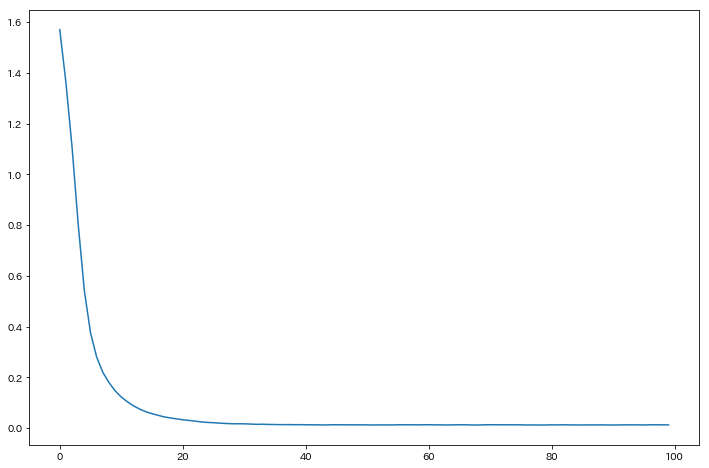

In [94]:
instance.plot_mse()

In [95]:
instance.color_predict()

元の行列


,0,1,2,3
0,5,3,0,1
1,4,0,0,1
2,1,1,0,5
3,1,0,0,4
4,0,1,5,4


****************************************
バイアス項つきMF


,0,1,2,3
0,4.983,3.002,3.738,1.014
1,3.995,2.200,3.571,1.010
2,1.010,1.006,4.443,4.975
3,1.012,0.737,3.969,3.991
4,1.636,1.018,4.985,3.993
